In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('merged_demographics.csv')  # Update the path accordingly

In [15]:
# Display the first few rows of the dataset
print(data.head())

  climber_name  route grade climbing_time  right_hand_moves  left_hand_moves  \
0        Anish      1    v3          0:31                 6                4   
1        Anish      2    v1          0:24                 6                5   
2         Noah      3    v5          0:05                 1                1   
3        Rishu      3    v5          0:07                 1                1   
4        Anish      4    v2          0:19                 5                5   

   right_leg_moves  left_leg_moves  total_num_moves  success  ...  start_time  \
0                6               6               22     True  ...        0:05   
1                3               5               19     True  ...        0:06   
2                1               1                4    False  ...        0:00   
3                2               1                5    False  ...        0:01   
4                5               4               19     True  ...        0:04   

  end_time  Age   Weight   Heigh

In [16]:
# Get all column names and their data types
columns_and_types = data.dtypes
print(columns_and_types)

climber_name         object
route                 int64
grade                object
climbing_time        object
right_hand_moves      int64
left_hand_moves       int64
right_leg_moves       int64
left_leg_moves        int64
total_num_moves       int64
success                bool
completion          float64
start_time           object
end_time             object
Age                 float64
Weight              float64
Height              float64
Gender               object
Avg Pull Ups        float64
Experience (yrs)    float64
Max Grades          float64
grade_numeric         int64
dtype: object


In [17]:
# Step 1: Convert 'grade' to a numerical value (use raw string to avoid the escape warning)
data['grade_numeric'] = data['grade'].str.extract(r'(\d+)').astype(int)

In [18]:
# Step 2: Check the first few rows to ensure everything is working correctly
print(data[['grade', 'grade_numeric', 'Experience (yrs)', 'success']].head())

  grade  grade_numeric  Experience (yrs)  success
0    v3              3             0.500     True
1    v1              1             0.500     True
2    v5              5             2.000    False
3    v5              5             0.166    False
4    v2              2             0.500     True


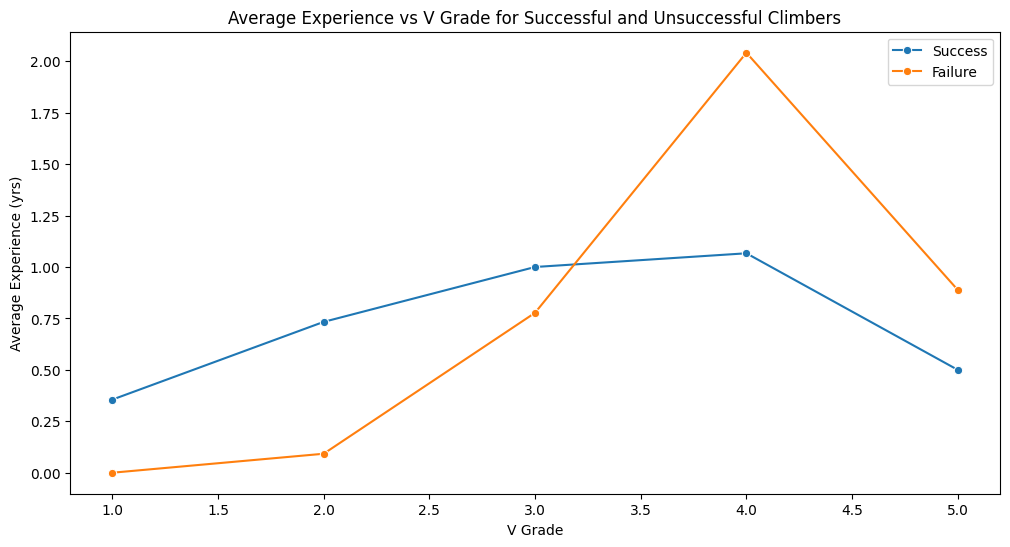

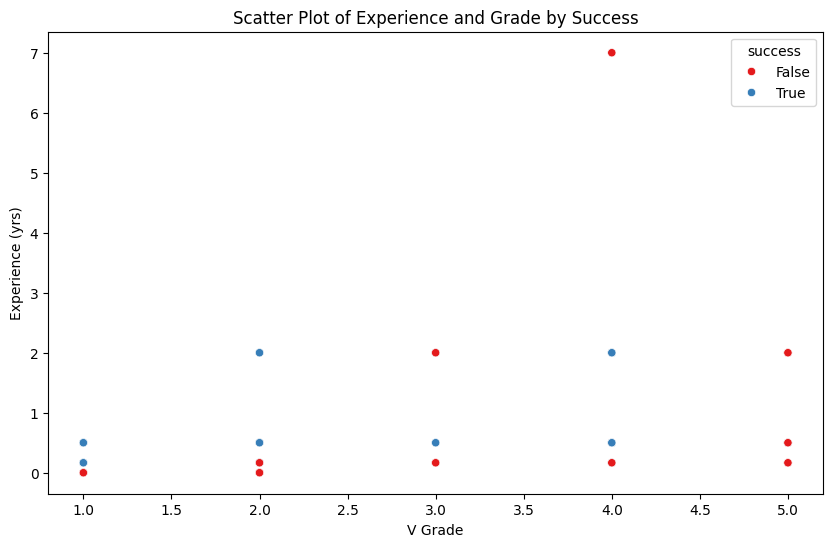

Correlation between Grade and Experience for Successful Climbers:
                   grade_numeric  Experience (yrs)
grade_numeric          1.000000          0.410814
Experience (yrs)       0.410814          1.000000


In [19]:
# Step 3: Group by 'grade_numeric' and calculate the mean experience for both successful and unsuccessful climbers
success_experience = data[data['success'] == True].groupby('grade_numeric')['Experience (yrs)'].mean()
failure_experience = data[data['success'] == False].groupby('grade_numeric')['Experience (yrs)'].mean()

# Combine the data for visualization
experience_data = pd.DataFrame({
    'Success': success_experience,
    'Failure': failure_experience
}).reset_index()

# Step 4: Plot the data to compare experience for success and failure across grades
plt.figure(figsize=(12, 6))
sns.lineplot(data=experience_data, x='grade_numeric', y='Success', label='Success', marker='o')
sns.lineplot(data=experience_data, x='grade_numeric', y='Failure', label='Failure', marker='o')
plt.title('Average Experience vs V Grade for Successful and Unsuccessful Climbers')
plt.xlabel('V Grade')
plt.ylabel('Average Experience (yrs)')
plt.legend()
plt.show()

# Step 5: Scatter plot showing the relationship between experience, grade, and success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade_numeric', y='Experience (yrs)', hue='success', data=data, palette='Set1')
plt.title('Scatter Plot of Experience and Grade by Success')
plt.xlabel('V Grade')
plt.ylabel('Experience (yrs)')
plt.show()

# Step 6: Correlation between grade and experience for successful climbers
correlation_success = data[data['success'] == True][['grade_numeric', 'Experience (yrs)']].corr()
print("Correlation between Grade and Experience for Successful Climbers:\n", correlation_success)

In [22]:
# Check all column names to verify the exact name of 'Avg Pull Ups'
print(data.columns)

Index(['climber_name', 'route', 'grade', 'climbing_time', 'right_hand_moves',
       'left_hand_moves', 'right_leg_moves', 'left_leg_moves',
       'total_num_moves', 'success', 'completion', 'start_time', 'end_time',
       'Age ', 'Weight ', 'Height ', 'Gender', 'Avg Pull Ups ',
       'Experience (yrs)', 'Max Grades', 'grade_numeric'],
      dtype='object')


In [23]:
# Step 1: Convert 'grade' to a numeric value (if not already done)
data['grade_numeric'] = data['grade'].str.extract(r'(\d+)').astype(int)

# Step 2: Check the first few rows to ensure the dataset is properly loaded
print(data[['grade', 'grade_numeric', 'Avg Pull Ups ', 'success']].head())

  grade  grade_numeric  Avg Pull Ups   success
0    v3              3           10.0     True
1    v1              1           10.0     True
2    v5              5            5.0    False
3    v5              5            6.0    False
4    v2              2           10.0     True


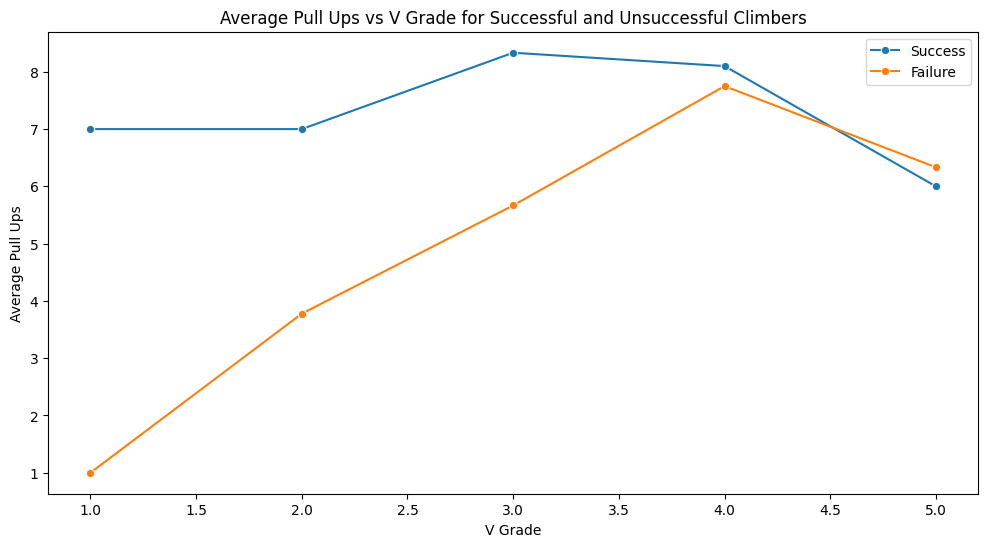

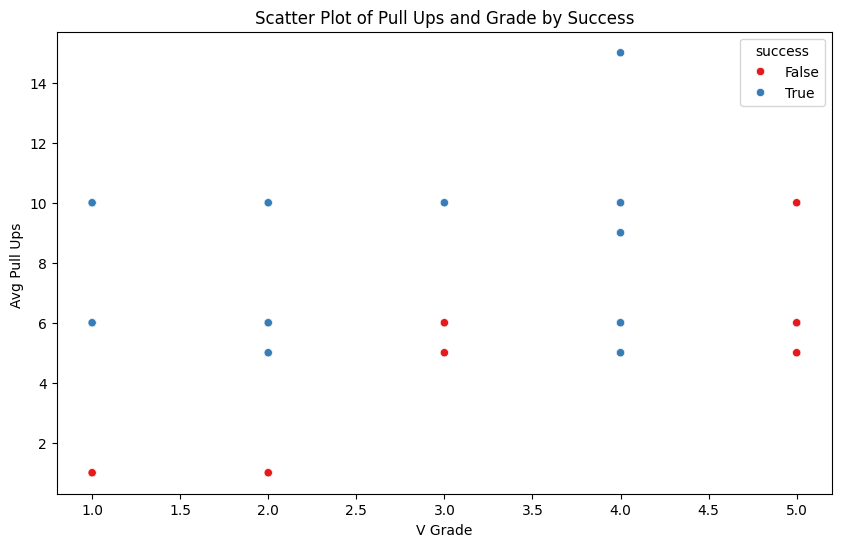

Correlation between Grade and Avg Pull Ups for Successful Climbers:
                grade_numeric  Avg Pull Ups 
grade_numeric       1.000000       0.151045
Avg Pull Ups        0.151045       1.000000


In [24]:
# Step 3: Group by 'grade_numeric' and calculate the average pull-ups for successful and unsuccessful climbers
success_pullups = data[data['success'] == True].groupby('grade_numeric')['Avg Pull Ups '].mean()
failure_pullups = data[data['success'] == False].groupby('grade_numeric')['Avg Pull Ups '].mean()

# Combine the data for visualization
pullups_data = pd.DataFrame({
    'Success': success_pullups,
    'Failure': failure_pullups
}).reset_index()

# Step 4: Plot the data to compare pull-ups for success and failure across grades
plt.figure(figsize=(12, 6))
sns.lineplot(data=pullups_data, x='grade_numeric', y='Success', label='Success', marker='o')
sns.lineplot(data=pullups_data, x='grade_numeric', y='Failure', label='Failure', marker='o')
plt.title('Average Pull Ups vs V Grade for Successful and Unsuccessful Climbers')
plt.xlabel('V Grade')
plt.ylabel('Average Pull Ups')
plt.legend()
plt.show()

# Step 5: Scatter plot showing the relationship between pull-ups, grade, and success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade_numeric', y='Avg Pull Ups ', hue='success', data=data, palette='Set1')
plt.title('Scatter Plot of Pull Ups and Grade by Success')
plt.xlabel('V Grade')
plt.ylabel('Avg Pull Ups ')
plt.show()

# Step 6: Correlation between grade and pull-ups for successful climbers
correlation_pullups = data[data['success'] == True][['grade_numeric', 'Avg Pull Ups ']].corr()
print("Correlation between Grade and Avg Pull Ups for Successful Climbers:\n", correlation_pullups)


In [26]:
# Checking correlation between 'Max Grades', 'Avg Pull Ups', and 'Experience (yrs)'
correlation_matrix = data[['Max Grades', 'Avg Pull Ups ', 'Experience (yrs)']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Max Grades  Avg Pull Ups   Experience (yrs)
Max Grades          1.000000       0.490824          0.400113
Avg Pull Ups        0.490824       1.000000          0.048464
Experience (yrs)    0.400113       0.048464          1.000000


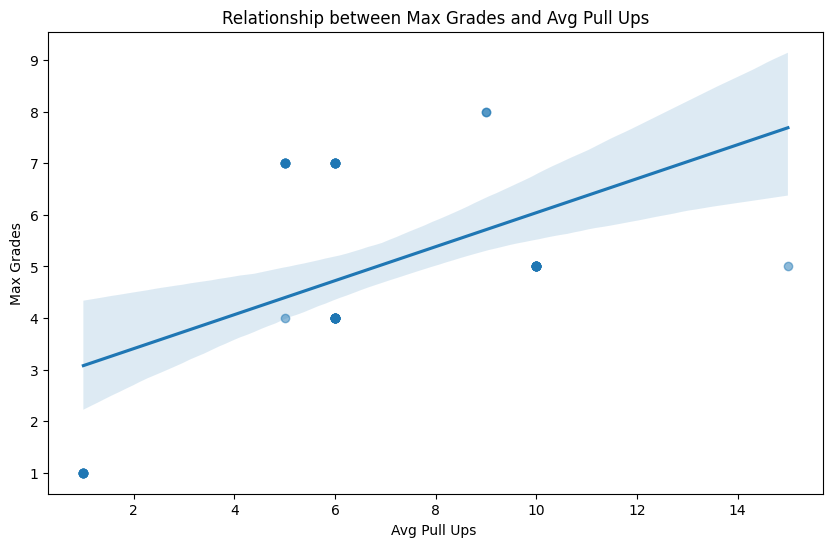

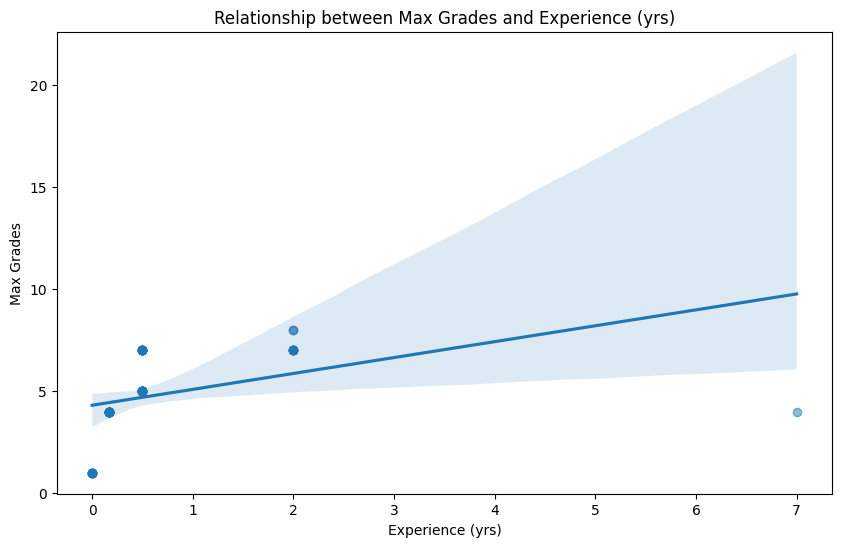

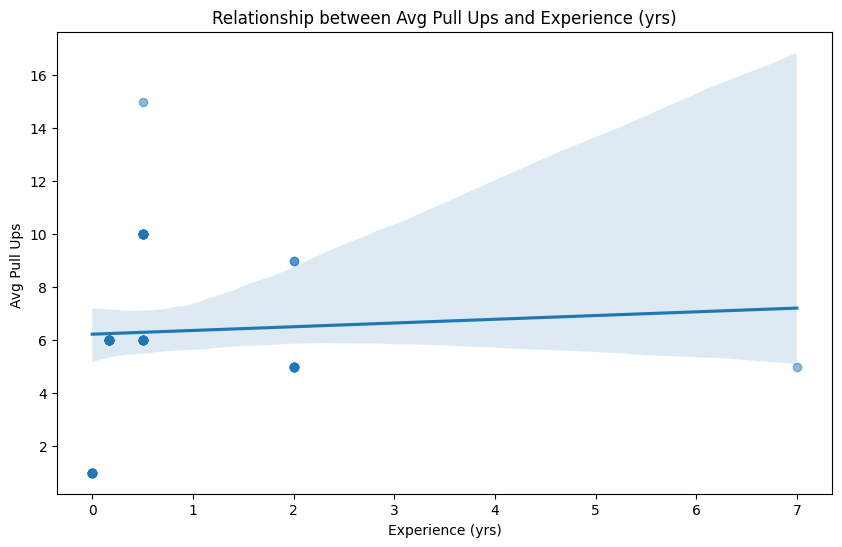

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between 'Max Grades' and 'Avg Pull Ups'
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg Pull Ups ', y='Max Grades', data=data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Max Grades and Avg Pull Ups')
plt.xlabel('Avg Pull Ups ')
plt.ylabel('Max Grades')
plt.show()

# Scatter plot between 'Max Grades' and 'Experience (yrs)'
plt.figure(figsize=(10, 6))
sns.regplot(x='Experience (yrs)', y='Max Grades', data=data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Max Grades and Experience (yrs)')
plt.xlabel('Experience (yrs)')
plt.ylabel('Max Grades')
plt.show()

# Scatter plot between 'Avg Pull Ups' and 'Experience (yrs)'
plt.figure(figsize=(10, 6))
sns.regplot(x='Experience (yrs)', y='Avg Pull Ups ', data=data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Avg Pull Ups and Experience (yrs)')
plt.xlabel('Experience (yrs)')
plt.ylabel('Avg Pull Ups ')
plt.show()
